In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
cri = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1", header=0)
cri.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
cri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [4]:
groupcri = cri.groupby('Player')['Ave'].sum()
groupcri = groupcri.reset_index()
groupcri.head()

,Player,Ave
0,A Flower (ZIM),35.34
1,A Jadeja (INDIA),37.47
2,A Ranatunga (SL),35.84
3,A Symonds (AUS),39.75
4,AB de Villiers (Afr/SA),53.55


In [5]:
stkrt = cri.groupby('Player')['SR'].sum()
stkrt = stkrt.reset_index()
stkrt.head()

,Player,SR
0,A Flower (ZIM),74.59
1,A Jadeja (INDIA),69.80
2,A Ranatunga (SL),77.90
3,A Symonds (AUS),92.44
4,AB de Villiers (Afr/SA),100.25


In [6]:
# merge the two dfs
grouped_df = pd.merge(groupcri, stkrt, on='Player', how='inner')
grouped_df.head()

,Player,Ave,SR
0,A Flower (ZIM),35.34,74.59
1,A Jadeja (INDIA),37.47,69.80
2,A Ranatunga (SL),35.84,77.90
3,A Symonds (AUS),39.75,92.44
4,AB de Villiers (Afr/SA),53.55,100.25


In [7]:
grouped_df.shape

(79, 3)

In [8]:
# 2. rescaling
rfm_df = grouped_df[['Ave', 'SR']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [9]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Ave', 'SR']
rfm_df_scaled.head()

,Ave,SR
0,-0.541237,-0.477102
1,-0.179085,-0.962790
2,-0.456225,-0.141480
3,0.208570,1.332823
4,2.554906,2.124728


In [10]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([1, 1, 1, 0, 3, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1, 2, 3, 3, 2, 3, 2, 1,
       1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 3, 0, 1,
       0, 2, 1, 0, 1, 2, 1, 3, 0, 2, 1, 1, 0])

In [12]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,Player,Ave,SR,cluster_id
0,A Flower (ZIM),35.34,74.59,1
1,A Jadeja (INDIA),37.47,69.80,1
2,A Ranatunga (SL),35.84,77.90,1
3,A Symonds (AUS),39.75,92.44,0
4,AB de Villiers (Afr/SA),53.55,100.25,3


In [13]:
#

In [27]:
grouped_df[grouped_df.cluster_id==3]

,Player,Ave,SR,cluster_id
4,AB de Villiers (Afr/SA),53.55,100.25,3
26,HM Amla (SA),50.25,89.05,3
28,IVA Richards (WI),47.00,90.20,3
38,MEK Hussey (AUS),48.15,87.16,3
39,MG Bevan (AUS),53.58,74.16,3
41,MJ Guptill (NZ),43.30,87.73,3
45,MS Dhoni (Asia/INDIA),51.32,88.69,3
63,SR Tendulkar (INDIA),44.83,86.23,3
73,V Kohli (INDIA),53.94,90.99,3


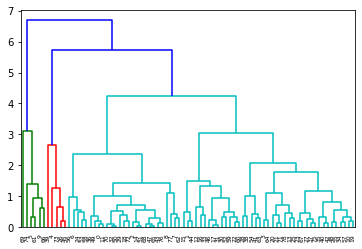

In [28]:
# single linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0,
       1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 3, 0, 1, 1, 0,
       3, 1, 0, 3, 0, 1, 0, 2, 3, 1, 0, 0, 1])

In [30]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,Player,Ave,SR,cluster_id,cluster_labels
0,A Flower (ZIM),35.34,74.59,1,0
1,A Jadeja (INDIA),37.47,69.80,1,1
2,A Ranatunga (SL),35.84,77.90,1,0
3,A Symonds (AUS),39.75,92.44,0,1
4,AB de Villiers (Afr/SA),53.55,100.25,3,2


In [41]:
grouped_df[grouped_df['cluster_labels']==1]

,Player,Ave,SR,cluster_id,cluster_labels
1,A Jadeja (INDIA),37.47,69.80,1,1
3,A Symonds (AUS),39.75,92.44,0,1
10,BC Lara (ICC/WI),40.48,79.51,2,1
12,CG Greenidge (WI),45.03,64.92,2,1
13,CH Gayle (ICC/WI),37.33,85.11,0,1
15,DC Boon (AUS),37.04,65.13,1,1
16,DL Haynes (WI),41.37,63.09,2,1
17,DM Jones (AUS),44.61,72.56,2,1
19,DR Martyn (AUS),40.80,77.73,2,1
20,EJG Morgan (ENG/IRE),38.73,88.62,0,1
